# Rap albums
## An Exploratory Data Analysis and Modeling
### Data scraped from Spotify (Studio Albums)

In [1]:
# Importing libraries
import pandas as pd 
import numpy as np 

In [2]:
# Read data from CSV file
df = pd.read_csv("rap.csv")

In [3]:
df.shape

(1303, 23)

In [4]:
# Remove everything after the first comma in the 'Artists' column
df['Artists'] = df['Artists'].str.split(',').str[0]

In [5]:
# Converting Release Date (Object Dtype) column to datetime Dtype
df['Release Date'] = pd.to_datetime(df['Release Date'], format='mixed')

# Extract numerical features from datetime columns
df['Release Day'] = df['Release Date'].dt.day
df['Release Month'] = df['Release Date'].dt.month
df['Release Year'] = df['Release Date'].dt.year

# milliseconds into minutes
df['duration_minutes'] = df['duration_ms'] / 60000

#Removing duration_ms column
df.drop(columns=['duration_ms'], inplace=True)

In [6]:
# Sort the DataFrame by 'Popularity Score' in descending order
df_sorted = df.sort_values(by='Popularity Score', ascending=False)

# Drop duplicates in the 'Name' column, keeping the first occurrence (highest popularity score)
df_unique = df_sorted.drop_duplicates(subset='Name', keep='first')

# Reset index to ensure the DataFrame index is sequential
df_unique = df_unique.reset_index(drop=True)

# Display the resulting DataFrame without duplicate 'Name' entries
print(df_unique)

                                                Name     Artists  \
0                                          One Dance       Drake   
1            Rich Baby Daddy (feat. Sexyy Red & SZA)       Drake   
2                                         Without Me      Eminem   
3                                    Flashing Lights  Kanye West   
4                                          Heartless  Kanye West   
..                                               ...         ...   
866             The Bidness - Album Version (Edited)  Snoop Dogg   
867  Can You Control Yo Hoe - Album Version (Edited)  Snoop Dogg   
868                          Dolomite Intro - Edited  Snoop Dogg   
869      WBallz (Interlude) - Album Version (Edited)  Snoop Dogg   
870                                Dolomite - Edited  Snoop Dogg   

                                       Album Release Date  Popularity Score  \
0                                      Views   2016-05-06                89   
1                        

In [7]:
# Rename column 'Popularity Score' to 'popularity' so it matches my audio features by just having single words on columns
df_unique = df_unique.rename(columns={'Popularity Score': 'popularity'})

# Display the DataFrame with the renamed column
print("\nDataFrame with Renamed Column:")
print(df_unique)


DataFrame with Renamed Column:
                                                Name     Artists  \
0                                          One Dance       Drake   
1            Rich Baby Daddy (feat. Sexyy Red & SZA)       Drake   
2                                         Without Me      Eminem   
3                                    Flashing Lights  Kanye West   
4                                          Heartless  Kanye West   
..                                               ...         ...   
866             The Bidness - Album Version (Edited)  Snoop Dogg   
867  Can You Control Yo Hoe - Album Version (Edited)  Snoop Dogg   
868                          Dolomite Intro - Edited  Snoop Dogg   
869      WBallz (Interlude) - Album Version (Edited)  Snoop Dogg   
870                                Dolomite - Edited  Snoop Dogg   

                                       Album Release Date  popularity  \
0                                      Views   2016-05-06          89   
1    

In [8]:
# Checking averages on my numerical colums
mean_values_of_features = df_unique.groupby('Artists')[['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
                                                 'speechiness', 'acousticness', 'instrumentalness',
                                                 'liveness', 'valence', 'tempo', 'duration_minutes',
                                                 'time_signature', 'Release Day', 'Release Month',
                                                 'Release Year']].mean()
print(mean_values_of_features)

            popularity  danceability    energy       key  loudness      mode  \
Artists                                                                        
2Pac         51.648148      0.777333  0.699481  5.685185 -7.948981  0.574074   
Drake        65.286667      0.630440  0.536839  4.580000 -8.803433  0.560000   
Eminem       54.715152      0.723133  0.738986  5.466667 -5.493509  0.551515   
Kanye West   60.781065      0.581645  0.587699  5.544379 -6.955473  0.502959   
Snoop Dogg   25.960961      0.689940  0.715757  5.441441 -5.645153  0.585586   

            speechiness  acousticness  instrumentalness  liveness   valence  \
Artists                                                                       
2Pac           0.229715      0.122205          0.002587  0.223039  0.624204   
Drake          0.195727      0.230811          0.014965  0.187671  0.336602   
Eminem         0.285808      0.164392          0.001795  0.292813  0.545161   
Kanye West     0.226082      0.257976       

In [9]:
import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

import statsmodels.api as sm
import scipy.stats as stats
from scipy import stats

Mean values of features sorted in descending order:
Artists
Drake         65.286667
Kanye West    60.781065
Eminem        54.715152
2Pac          51.648148
Snoop Dogg    25.960961
Name: popularity, dtype: float64


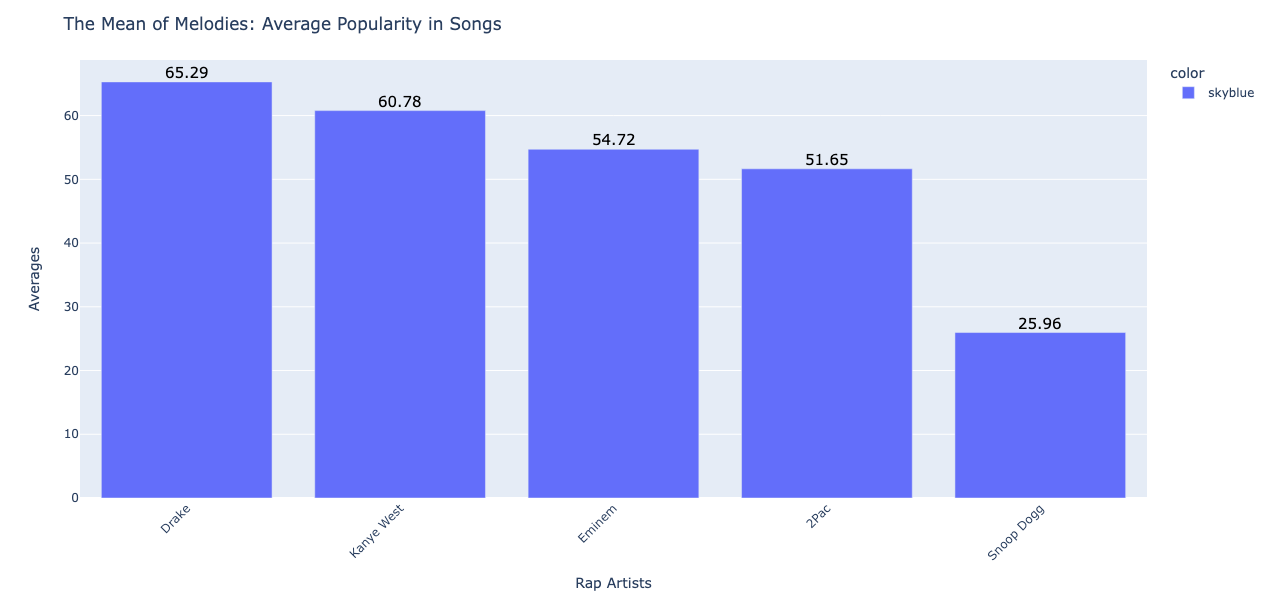

In [10]:
# Sort the average/mean values in descending order
sorted_mean_values_for_popularity = mean_values_of_features.sort_values('popularity',ascending=False)

print("Mean values of features sorted in descending order:")
print(sorted_mean_values_for_popularity['popularity'])


# Extracting the sorted mean values for 'popularity'
popularity_mean_sorted = sorted_mean_values_for_popularity['popularity']


# Define colors for the bars
colors = ['skyblue' if x != 'popularity' else 'salmon' for x in popularity_mean_sorted.index]

# Create a bar chart using the sorted mean values for 'popularity'
fig = px.bar(x=popularity_mean_sorted.index, y=popularity_mean_sorted, color=colors)

# Add labels and title
fig.update_layout(
    xaxis_title='Rap Artists',
    yaxis_title='Averages',
    title='The Mean of Melodies: Average Popularity in Songs',
    xaxis_tickangle= -45,  # Rotate x-axis labels for better visibility
    height=600,  # Adjust the height of the chart
    width=1200    # Adjust the width of the chart
    
)

# Add labels for the percentage on top of each bar
for i, mean_value in enumerate(popularity_mean_sorted):
    fig.add_annotation(
        x=popularity_mean_sorted.index[i],
        y=mean_value,
        text=f'{mean_value:.2f}',
        font=dict(color='black', size=15), #change size of percentage
        showarrow=False,
        yshift=10 #change distance between bar and % number
    )

# Show plot
fig.show()

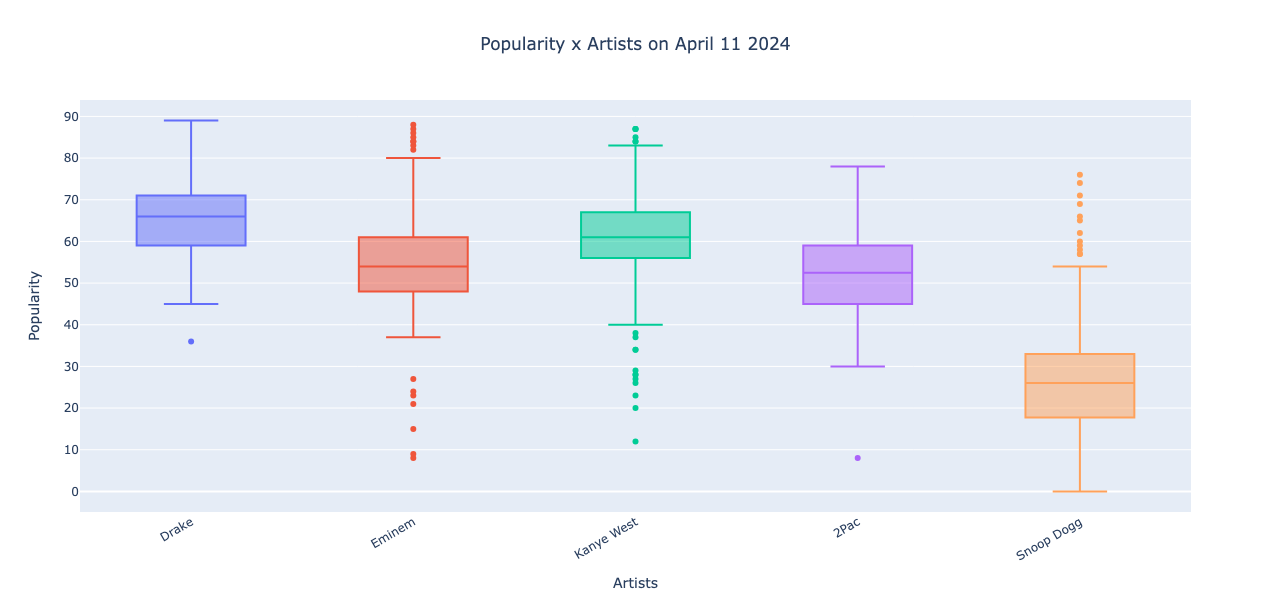

In [11]:
# Box plot
box_plot = px.box(df_unique, x='Artists', y='popularity', color='Artists',
                  title='Popularity x Artists on April 11 2024',
                  labels={'Artists': 'Artists', 'popularity': 'Popularity'}) # second is the label

# Update layout
box_plot.update_layout(
    showlegend=False, 
    height=600, 
    width=1200,  
    title_x=0.5  # Center title
)

# Rotate x-axis tick labels diagonally
box_plot.update_layout(
    xaxis=dict(
        tickangle=-30,
        tickmode='array',
        tickvals=list(range(len(df_unique['Artists'].unique()))),
        ticktext=list(df_unique['Artists'].unique())
    )
)

# Show the box plot
box_plot.show()

In [12]:
# Adding new column named, Genre
df_unique['Genre'] = 'Rap'

# Export the DataFrame to a new CSV file
df_unique.to_csv('df_rap_cleaned.csv', index=False)

In [13]:
# Select numerical columns
numerical_df= df_unique.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

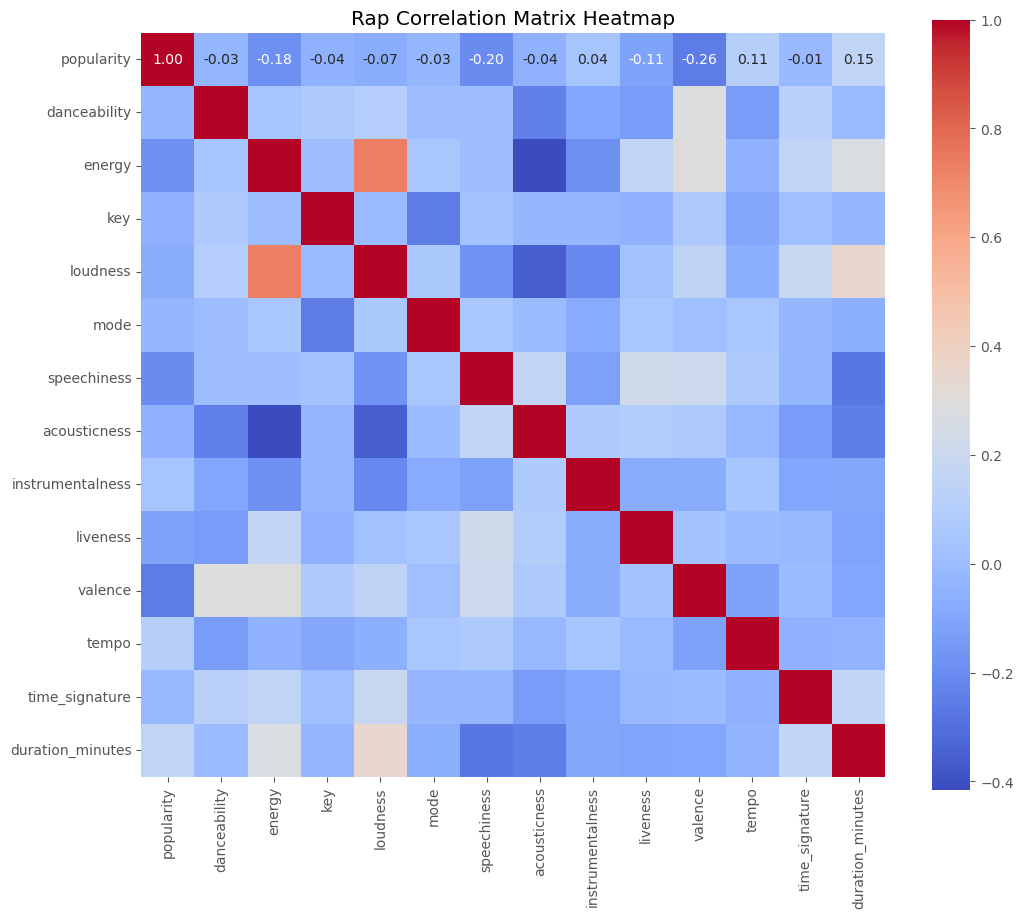

In [14]:
# Plot heatmap

# Create a new figure with a specified size (12 inches wide and 10 inches tall)
fig = plt.figure(figsize=(12, 10))

# Get the current Axes instance of the figure
ax = fig.gca()

# Plot the heatmap using seaborn's heatmap function
# correlation_matrix: the data to be plotted, assumed to be a correlation matrix
# annot=True: annotate each cell with the numeric value
# fmt=".2f": format for annotations, displaying two decimal places
# cmap='coolwarm': color map for the heatmap (cool to warm colors)
# ax=ax: plot the heatmap on the specified Axes instance
# annot_kws={"size": 10}: set the font size of the annotations to 10
# square=True: ensure the aspect ratio of the plot is square
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=ax, annot_kws={"size": 10}, square=True)

# Add a title to the plot
plt.title('Rap Correlation Matrix Heatmap')

# Display the plot
plt.show()

In [15]:
# Create dummy variables for specified values in 'Artists'
key_name_dummies = pd.get_dummies(df_unique['Artists'], prefix='', prefix_sep='', columns=['Drake', 'Eminem', 
                                                                                           'Kanye West', '2Pac', 
                                                                                           'Snoop Dogg'], dtype='int')
# Concatenate the dummy variables with the original DataFrame
df_encoded = pd.concat([df_unique, key_name_dummies], axis=1)

df_encoded.shape

(871, 32)

# Model

In [16]:
import sklearn as skl
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Feature matrix and target vector respectively
X = df_encoded.select_dtypes(['float', 'int'])
y = df_encoded['popularity']

X = X.drop(columns=['popularity'])

# popularity is gone 
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      871 non-null    float64
 1   energy            871 non-null    float64
 2   key               871 non-null    int64  
 3   loudness          871 non-null    float64
 4   mode              871 non-null    int64  
 5   speechiness       871 non-null    float64
 6   acousticness      871 non-null    float64
 7   instrumentalness  871 non-null    float64
 8   liveness          871 non-null    float64
 9   valence           871 non-null    float64
 10  tempo             871 non-null    float64
 11  time_signature    871 non-null    int64  
 12  Release Day       871 non-null    int32  
 13  Release Month     871 non-null    int32  
 14  Release Year      871 non-null    int32  
 15  duration_minutes  871 non-null    float64
 16  2Pac              871 non-null    int64  
 1

In [17]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a list of alpha values to try for Lasso and Ridge regression
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Store results
results = []

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
linear_pred = linear_reg.predict(X_test_scaled)
linear_r2 = r2_score(y_test, linear_pred)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_mape = np.mean(np.abs((y_test - linear_pred) / y_test)) * 100

results.append({
    'Model': 'Linear Regression',
    'R2 Score': linear_r2,
    'MSE': linear_mse,
    'MAPE': linear_mape
})

# Lasso Regression
for alpha in alpha_values:
    lasso = Lasso(alpha=0.1, max_iter=1000, random_state=42) 
    lasso.fit(X_train_scaled, y_train)
    lasso_pred = lasso.predict(X_test_scaled)
    lasso_r2 = r2_score(y_test, lasso_pred)
    lasso_mse = mean_squared_error(y_test, lasso_pred)
    lasso_mape = np.mean(np.abs((y_test - lasso_pred) / y_test)) * 100

    results.append({
        'Model': f'Lasso (alpha={alpha})',
        'R2 Score': lasso_r2,
        'MSE': lasso_mse,
        'MAPE': lasso_mape
    })

# Ridge Regression
for alpha in alpha_values:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    ridge_pred = ridge.predict(X_test_scaled)
    ridge_r2 = r2_score(y_test, ridge_pred)
    ridge_mse = mean_squared_error(y_test, ridge_pred)
    ridge_mape = np.mean(np.abs((y_test - ridge_pred) / y_test)) * 100
    
    results.append({
        'Model': f'Ridge (alpha={alpha})',
        'R2 Score': ridge_r2,
        'MSE': ridge_mse,
        'MAPE': ridge_mape
    })


In [18]:
# Convert results to DataFrame for easier visualization
results_rap_df_one = pd.DataFrame(results)

# Print results
print(results_rap_df_one)

                  Model  R2 Score         MSE  MAPE
0     Linear Regression  0.652677  154.602759   inf
1   Lasso (alpha=0.001)  0.650391  155.620646   inf
2    Lasso (alpha=0.01)  0.650391  155.620646   inf
3     Lasso (alpha=0.1)  0.650391  155.620646   inf
4       Lasso (alpha=1)  0.650391  155.620646   inf
5      Lasso (alpha=10)  0.650391  155.620646   inf
6     Lasso (alpha=100)  0.650391  155.620646   inf
7   Ridge (alpha=0.001)  0.652137  154.843235   inf
8    Ridge (alpha=0.01)  0.652137  154.843189   inf
9     Ridge (alpha=0.1)  0.652138  154.842735   inf
10      Ridge (alpha=1)  0.652147  154.838558   inf
11     Ridge (alpha=10)  0.652165  154.830974   inf
12    Ridge (alpha=100)  0.647357  156.970800   inf


# Lasso 

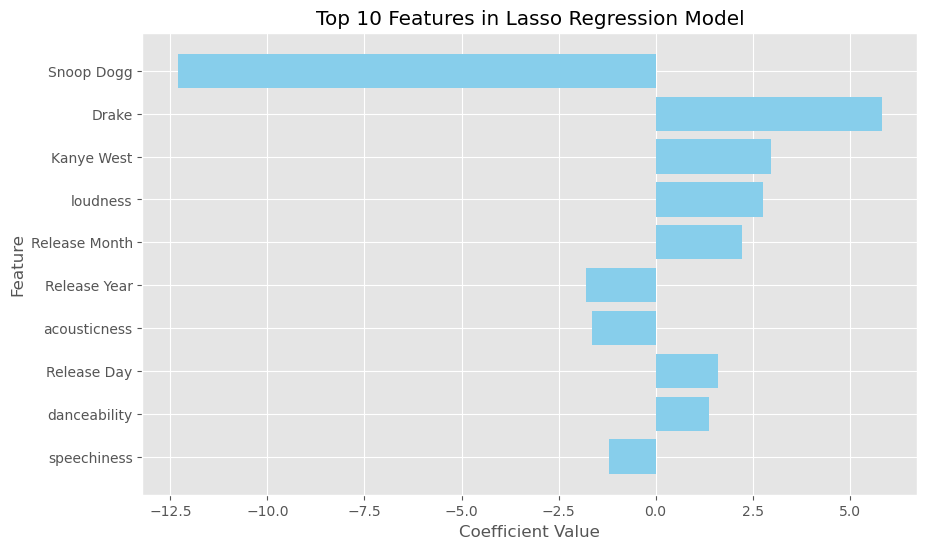

Test Score: 0.6503905020568039
MSE Score: 155.62064554166906


In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline with StandardScaler and Lasso regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])

# Define parameter grid for GridSearchCV
param_grid = {
    'lasso__alpha': [0.01, 0.1, 1, 10, 100]  # Example alpha values to search over
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Get best model
best_model = grid_search.best_estimator_

# Evaluate test score
test_score = best_model.score(X_test, y_test)

# Get coefficients and corresponding feature names from best model
coefficients = best_model.named_steps['lasso'].coef_
feature_names = X.columns

# Create a DataFrame to store coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort coefficients by absolute value
coefficients_df['Abs_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Select top 10 coefficients
top_10_coefficients = coefficients_df.head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_coefficients['Feature'], top_10_coefficients['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Features in Lasso Regression Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest coefficients on top
plt.show()

print("Test Score:", test_score)
y_pred = best_model.predict(X_test)

# Calculate MSE score
mse = mean_squared_error(y_test, y_pred)

# Print scores
print("MSE Score:", mse)

# Ridge 

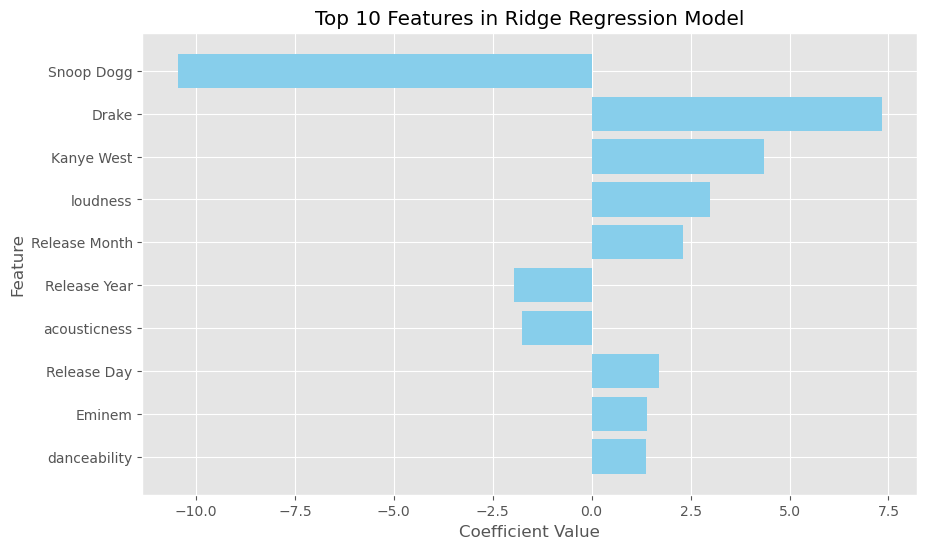

Test Score: 0.6521645387699965
MSE Score: 154.83097380750326


In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline with StandardScaler and Ridge regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Define parameter grid for GridSearchCV
param_grid = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 100]  # Example alpha values to search over
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Get best model
best_model = grid_search.best_estimator_

# Evaluate test score
test_score = best_model.score(X_test, y_test)

# Get coefficients and corresponding feature names from best model
coefficients = best_model.named_steps['ridge'].coef_
feature_names = X.columns

# Create a DataFrame to store coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort coefficients by absolute value
coefficients_df['Abs_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Select top 10 coefficients
top_10_coefficients = coefficients_df.head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_coefficients['Feature'], top_10_coefficients['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Features in Ridge Regression Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest coefficients on top
plt.show()

print("Test Score:", test_score)
y_pred = best_model.predict(X_test)

# Calculate MSE score
mse = mean_squared_error(y_test, y_pred)

# Print scores
print("MSE Score:", mse)